<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B52(2)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
matplotlib.use("Agg")

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/flower_photos")))

random.shuffle(imagePaths)

In [ ]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # 

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
INIT_LR = 0.01
EPOCHS = 35


In [ ]:
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=256)

Epoch 1/35
9/9 [==============================] - 2s 183ms/step - loss: 1.6104 - accuracy: 0.2500 - val_loss: 1.5587 - val_accuracy: 0.2995
Epoch 2/35
9/9 [==============================] - 1s 91ms/step - loss: 1.5414 - accuracy: 0.3169 - val_loss: 1.5215 - val_accuracy: 0.3338
Epoch 3/35
9/9 [==============================] - 1s 92ms/step - loss: 1.5018 - accuracy: 0.3473 - val_loss: 1.4819 - val_accuracy: 0.3377
Epoch 4/35
9/9 [==============================] - 1s 91ms/step - loss: 1.4670 - accuracy: 0.3750 - val_loss: 1.4579 - val_accuracy: 0.3786
Epoch 5/35
9/9 [==============================] - 1s 87ms/step - loss: 1.4388 - accuracy: 0.3944 - val_loss: 1.4384 - val_accuracy: 0.3786
Epoch 6/35
9/9 [==============================] - 1s 92ms/step - loss: 1.4133 - accuracy: 0.3988 - val_loss: 1.4173 - val_accuracy: 0.4063
Epoch 7/35
9/9 [==============================] - 1s 87ms/step - loss: 1.3938 - accuracy: 0.4186 - val_loss: 1.3988 - val_accuracy: 0.4050
Epoch 8/35
9/9 [==========

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

       daisy       0.40      0.60      0.48       149
   dandelion       0.47      0.40      0.43       151
       roses       0.57      0.52      0.55       144
  sunflowers       0.54      0.76      0.63       151
      tulips       0.59      0.23      0.33       163

    accuracy                           0.50       758
   macro avg       0.51      0.50      0.48       758
weighted avg       0.51      0.50      0.48       758



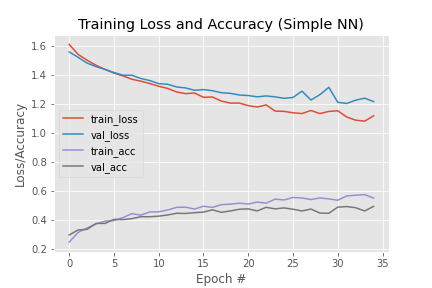

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

In [ ]:
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving 1656007715_45-mykaleidoscope-ru-p-sirenevie-tyulpani-buket-krasivo-foto-51.jpg to 1656007715_45-mykaleidoscope-ru-p-sirenevie-tyulpani-buket-krasivo-foto-51.jpg


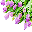

In [ ]:
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [ ]:
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [ ]:
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [ ]:
preds = model.predict(image)
print(preds)

1/1 [==============================] - 134s 134s/step
[[0.47702762 0.14771156 0.17844868 0.06302319 0.13378888]]


In [ ]:
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [ ]:
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [125, 231, 184],
        [123, 234, 184],
        [130, 245, 195]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [128, 230, 183],
        [123, 233, 185],
        [129, 244, 194]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [138, 231, 186],
        [124, 233, 185],
        [125, 240, 191]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

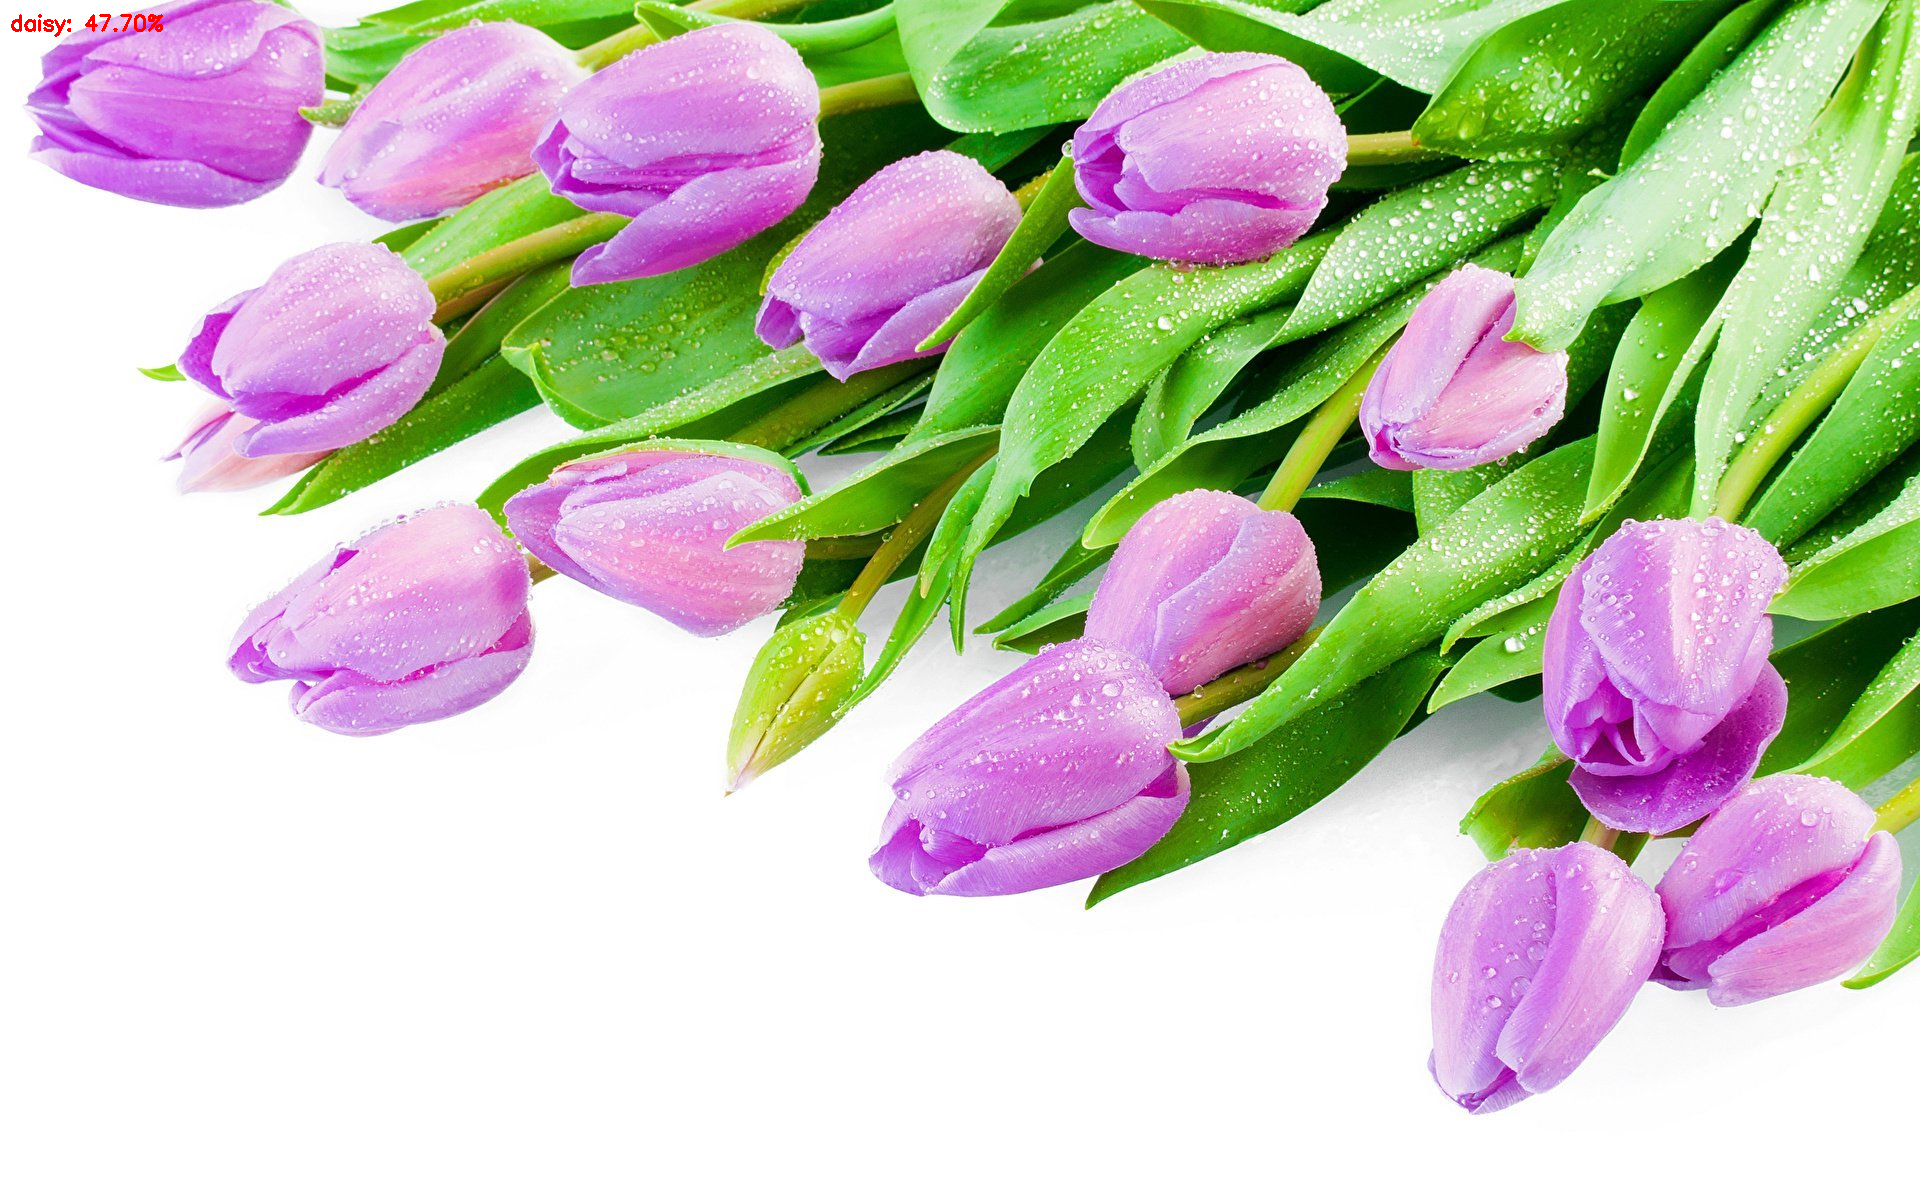

In [ ]:
cv2_imshow(output)